In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [8]:
df = pd.read_csv('NationalNames.csv')
df.columns

Index([u'Id', u'Name', u'Year', u'Gender', u'Count'], dtype='object')

In [9]:
male_bible_names = set(pd.read_csv('male-bible-names.txt', header=None).loc[:, 0])
female_bible_names = set(pd.read_csv('female-bible-names.txt', header=None).loc[:, 0])

In [10]:
def plot_name_trend(male_name_set, female_name_set):
    male_fracs = []
    female_fracs = []

    years = xrange(df['Year'].min(), df['Year'].max() + 1, 1)

    for year in years:
        df_year = df.loc[(df['Year'] == year), :]
        pop_count = 1. * df_year['Count'].sum()
        
        male_count = df_year.loc[df_year['Name'].apply(lambda x : x in male_name_set) & (df_year['Gender'] == 'M')]['Count'].sum()
        female_count = df_year.loc[df_year['Name'].apply(lambda x : x in female_name_set) & (df_year['Gender'] == 'F')]['Count'].sum()

        male_frac, female_frac = male_count / pop_count, female_count / pop_count

        male_fracs.append(male_frac)
        female_fracs.append(female_frac)

    male_fracs = np.array(male_fracs)
    female_fracs = np.array(female_fracs)

    fig = plt.figure(figsize=(20, 8))

    male_ax = fig.add_subplot(1, 3, 1)
    female_ax = fig.add_subplot(1, 3, 2)
    all_ax = fig.add_subplot(1, 3, 3)

    male_ax.scatter(years, male_fracs, color='blue', marker='x')
    female_ax.scatter(years, female_fracs, color='red', marker='x')
    all_ax.scatter(years, female_fracs + male_fracs, color='purple', marker='x')
    
    male_ax.set_xlim(1879.5, 2010.5)
    female_ax.set_xlim(1879.5, 2010.5)
    all_ax.set_xlim(1879.5, 2010.5)

    male_ax.set_title('fraction of males with biblical names')
    female_ax.set_title('fraction of females with biblical names')
    all_ax.set_title('fraction of people with biblical names')

    male_ax.set_xlabel('year')
    male_ax.set_ylabel('fraction')

    female_ax.set_xlabel('year')
    female_ax.set_ylabel('fraction')
    
    all_ax.set_xlabel('year')
    all_ax.set_ylabel('fraction')
    
    male_ax.grid(False)
    female_ax.grid(False)
    all_ax.grid(False)

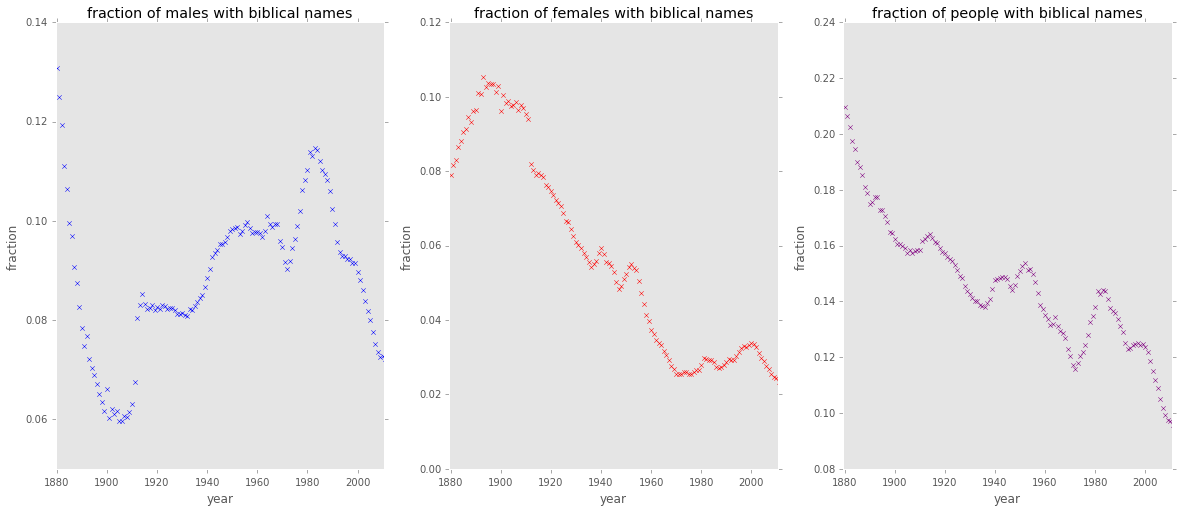

In [11]:
plot_name_trend(male_bible_names, female_bible_names)

state_df = pd.read_csv('StateNames.csv')

state_year_pops = {}

In [12]:
for state in state_df['State'].drop_duplicates():
    temp_df = state_df.loc[(state_df['State'] == state)]
    for year in state_df['Year'].drop_duplicates():
        if state not in state_year_pops:
            state_year_pops[state] = {}
        state_year_pops[state][year] = temp_df.loc[(temp_df['Year'] == year)]['Count'].sum()                

male_bible_state_df = state_df.loc[state_df['Name'].apply(lambda x : x in male_bible_names)]

male_counts = male_bible_state_df.groupby(['Year', 'State']).sum()

for index, row in male_counts.iterrows():
    year, state = index[0], index[1]
    male_counts.set_value(index, 'Fraction', 1.0 * male_counts.loc[index, 'Count'] / state_year_pops[state][year])

male_counts.reset_index(inplace=True)

male_counts.sort_values(['Year', 'Fraction'], ascending=True, inplace=True)


male_counts.head()

,Year,State,Id,Count,Fraction
48,1910,WI,60486356,361,0.039222
23,1910,MN,26974779,348,0.042538
12,1910,IA,12851424,342,0.043346
28,1910,ND,25673948,129,0.043391
22,1910,MI,33341855,553,0.045816


In [ ]:
for year in male_counts.Year:
    fertility = male_counts[fraction]
    fertility.name = ''
    new_df = pd.concat([fertility, life, population, region_name], axis=1)
    sources['_' + str(year)] = ColumnDataSource(new_df)

In [13]:
for year in xrange(1910, 2015, 20):
    states = list(reversed(list(male_counts.loc[male_counts['Year'] == year]['State'])))
    fracs = list(reversed(list(male_counts.loc[male_counts['Year'] == year]['Fraction'])))
    
    print year
    
    for i in xrange(len(states)):
        print "%s, %.3f" % (states[i], fracs[i])

1910
AK, 0.183
WY, 0.152
NV, 0.149
DC, 0.135
HI, 0.107
DE, 0.106
SC, 0.099
RI, 0.098
AZ, 0.094
MD, 0.089
MA, 0.089
NJ, 0.087
FL, 0.087
CT, 0.087
NC, 0.084
PA, 0.083
NY, 0.082
GA, 0.079
ID, 0.078
VA, 0.076
MS, 0.076
CA, 0.071
MT, 0.070
LA, 0.070
TN, 0.069
IL, 0.068
AL, 0.067
CO, 0.066
KY, 0.065
UT, 0.064
VT, 0.064
NM, 0.062
NH, 0.060
OH, 0.060
OR, 0.059
MO, 0.056
AR, 0.055
SD, 0.055
WA, 0.054
KS, 0.051
WV, 0.050
OK, 0.049
TX, 0.049
NE, 0.048
ME, 0.048
IN, 0.047
MI, 0.046
ND, 0.043
IA, 0.043
MN, 0.043
WI, 0.039
1930
AK, 0.154
DE, 0.129
DC, 0.122
PA, 0.114
NJ, 0.114
MA, 0.113
CT, 0.113
MD, 0.110
SC, 0.107
RI, 0.105
NY, 0.104
GA, 0.096
AL, 0.095
NC, 0.095
TN, 0.095
FL, 0.094
VA, 0.092
MS, 0.092
OH, 0.090
KY, 0.087
LA, 0.086
IL, 0.085
HI, 0.084
WV, 0.082
IN, 0.082
NH, 0.078
MT, 0.078
AR, 0.078
MI, 0.077
WY, 0.076
VT, 0.076
WI, 0.074
MO, 0.074
NV, 0.073
MN, 0.069
AZ, 0.065
CA, 0.065
CO, 0.064
TX, 0.064
IA, 0.064
ME, 0.062
OK, 0.061
WA, 0.061
OR, 0.060
ND, 0.059
KS, 0.056
NE, 0.056
SD, 0.053


In [14]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
seg = map.states[state_names.index('Texas')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

plt.show()

ImportError: No module named basemap